In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data is available at the [UCI ML Website](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction)

In [2]:
# Importing the data file and printing shape

df = pd.read_csv('energydata_complete.csv', parse_dates=['date'])
df.shape

(19735, 29)

In [3]:
# Print basic information of the dataframe varibles

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [4]:
# Drop random variables as they are not used for prediction

df.drop(['rv1', 'rv2'], axis=1, inplace=True)

In [5]:
# Summary statistics of the numeric columns in the data

round(df.describe().T, 1)

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.7,102.5,10.0,50.0,60.0,100.0,1080.0
lights,19735.0,3.8,7.9,0.0,0.0,0.0,0.0,70.0
T1,19735.0,21.7,1.6,16.8,20.8,21.6,22.6,26.3
RH_1,19735.0,40.3,4.0,27.0,37.3,39.7,43.1,63.4
T2,19735.0,20.3,2.2,16.1,18.8,20.0,21.5,29.9
RH_2,19735.0,40.4,4.1,20.5,37.9,40.5,43.3,56.0
T3,19735.0,22.3,2.0,17.2,20.8,22.1,23.3,29.2
RH_3,19735.0,39.2,3.3,28.8,36.9,38.5,41.8,50.2
T4,19735.0,20.9,2.0,15.1,19.5,20.7,22.1,26.2
RH_4,19735.0,39.0,4.3,27.7,35.5,38.4,42.2,51.1


Text(0, 0.5, 'Energy use in Wh')

<Figure size 432x288 with 0 Axes>

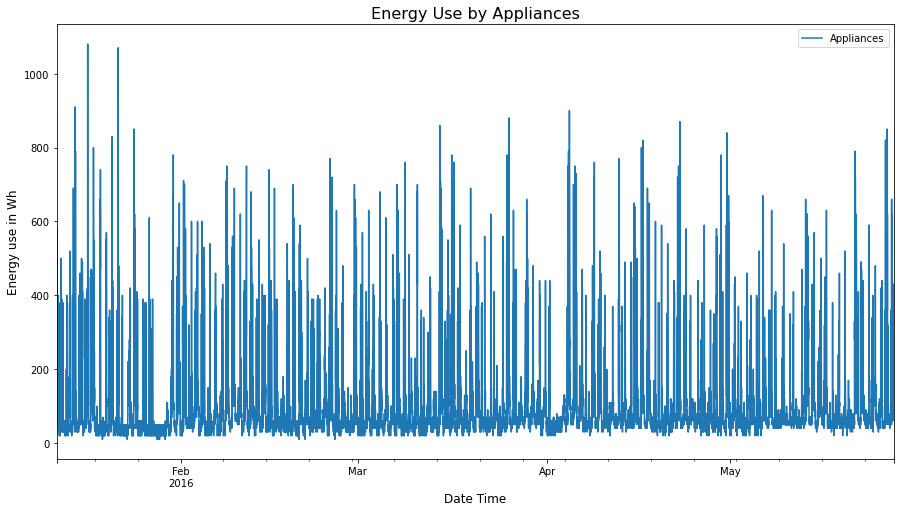

In [6]:
# Basic exploration of the energy use of appliances by plotting over the provided data duration

fig = plt.figure()
df.plot(x = 'date', y = 'Appliances', figsize = (15,8))
plt.title('Energy Use by Appliances', size=16)
plt.xlabel('Date Time', size=12)
plt.ylabel('Energy use in Wh', size=12)

Text(0.5, 1.0, 'Box-plot of Energy Use by Appliances')

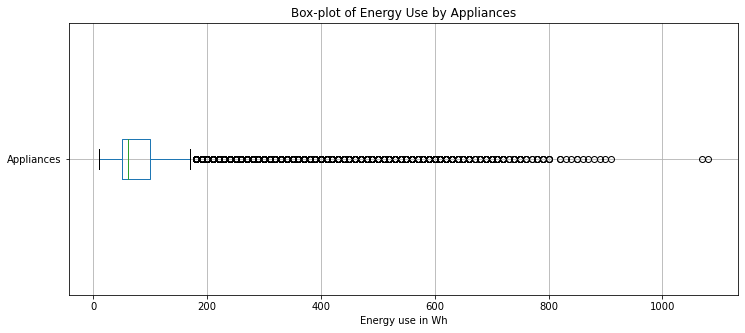

In [7]:
# Boxplot of Energy Use

fig, ax = plt.subplots(figsize = (12,5))
df.boxplot(column='Appliances', vert=False)
plt.xlabel('Energy use in Wh')
plt.title('Box-plot of Energy Use by Appliances')

Text(0.5, 1.0, 'Histogram of Log of Appliance Energy use')

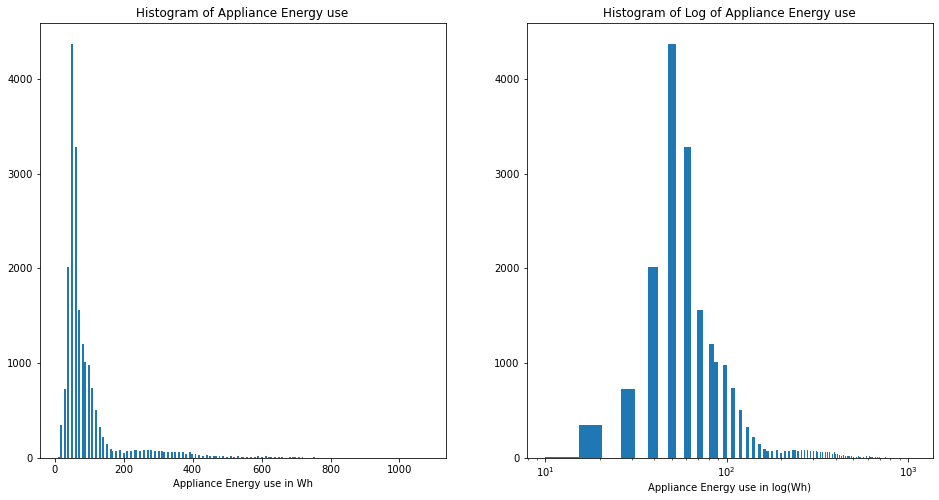

In [8]:
# Comparison of distribution of appliance energy use with log scale

fig, ax = plt.subplots(1,2, figsize = (16,8))

ax[0].hist(df['Appliances'], bins=200)
ax[0].set_xlabel('Appliance Energy use in Wh')
ax[0].set_title('Histogram of Appliance Energy use')

ax[1].hist(df['Appliances'], bins=200)
ax[1].set_xscale('log')
ax[1].set_xlabel('Appliance Energy use in log(Wh)')
ax[1].set_title('Histogram of Log of Appliance Energy use')


In [9]:
import scipy.stats as stats
import pylab

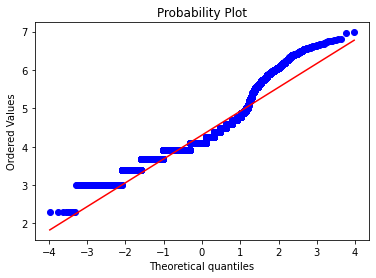

In [10]:
# Use probability plot to evaluate normal distribution of log of energy use

_=stats.probplot(np.log(df['Appliances']), dist="norm", plot=pylab)

### Observations
1. Energy use does not seem to have any specific pattern
2. Energy use by appliances is right skewed and looks like a log distribution
3. 75% of energy use if 100 Wh or less with only a couple of instances of > 1000 Wh of energy use
4. Changing the x-axis to log scale makes the distribution close to normal
5. Transforming the energy use to log energy use can help with prediction accuracy

Text(0, 0.5, 'Energy use in Wh')

<Figure size 432x288 with 0 Axes>

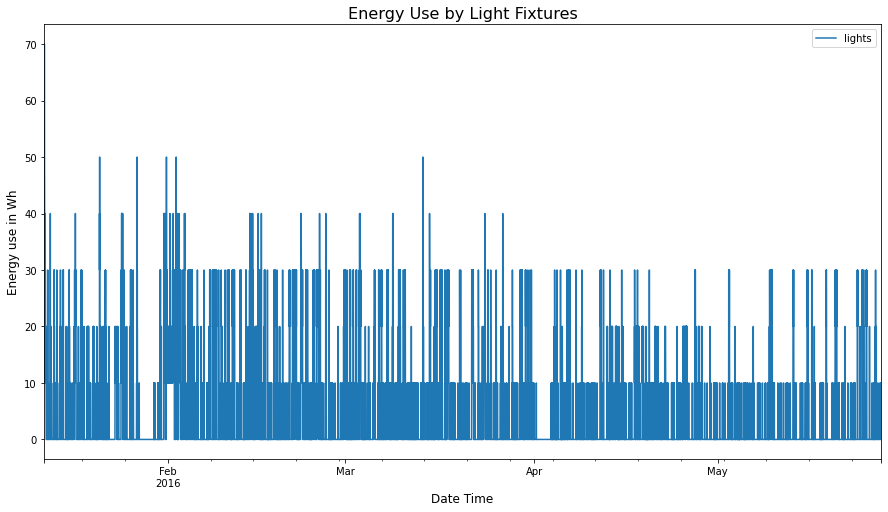

In [11]:
# Basic exploration of the energy use of light fixtures by plotting over the provided data duration

fig = plt.figure()
df.plot(x = 'date', y = 'lights', figsize = (15,8))
plt.title('Energy Use by Light Fixtures', size=16)
plt.xlabel('Date Time', size=12)
plt.ylabel('Energy use in Wh', size=12)

In [12]:
df['lights'].value_counts(normalize=True)

0     0.772840
10    0.112085
20    0.082290
30    0.028325
40    0.003902
50    0.000456
70    0.000051
60    0.000051
Name: lights, dtype: float64

### Observations
1. Light fixture energy use is significantly less than energy use by Appliances. 
2. 77% of values are 0 Wh with 99.5% 30 Wh or less
2. For prediction, we will only consider energy use by Appliances

### Exploration of Temperature and Humidity Sensors

In [13]:
# Defining Temperature and Humidity columns

Temp = ['T1','T2','T3','T4','T5','T6','T7','T8','T9','T_out']
Hum = ['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out']

Text(0.5, 1.0, 'Box-plot of Measurement from Temperature Sensors')

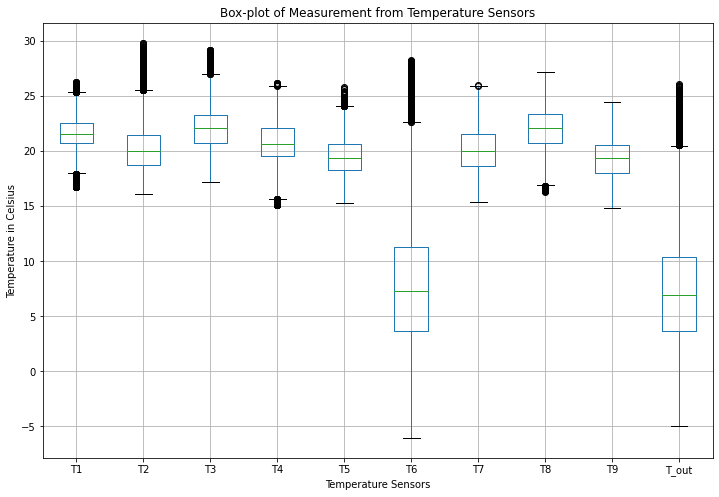

In [14]:
# Boxplots for Temperature Sensors

fig, ax = plt.subplots(figsize = (12,8))
df.boxplot(column=Temp)
plt.xlabel('Temperature Sensors')
plt.ylabel('Temperature in Celsius')
plt.title('Box-plot of Measurement from Temperature Sensors')

Text(0.5, 1.0, 'Box-plot of Measurement from Humidity Sensors')

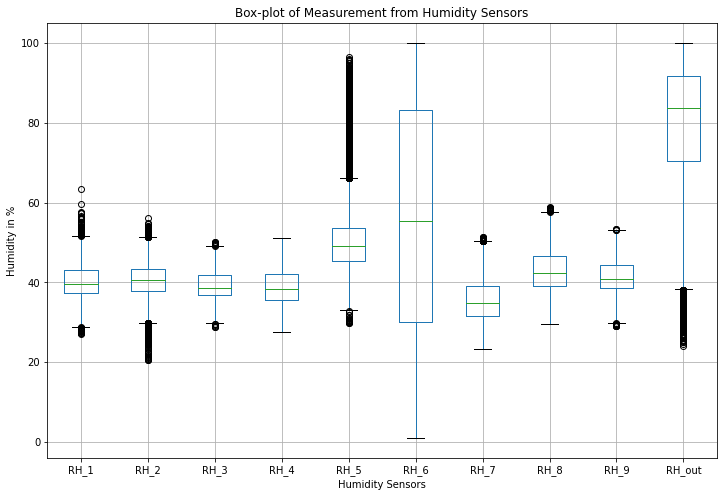

In [15]:
# Boxplots for Humidity Sensors

fig, ax = plt.subplots(figsize = (12,8))
df.boxplot(column=Hum)
plt.xlabel('Humidity Sensors')
plt.ylabel('Humidity in %')
plt.title('Box-plot of Measurement from Humidity Sensors')

### Observations
1. All temperatures inside the house are within similar range (15 to 30 degrees celsius)
2. Both outside temperatures are within similar range of (-5 to 30 degrees celsius)
3. Difference between inside and outside temperature can be used as a feature
4. RH_6 (Building outside) humidity distribution is different than that of RH_out (weather station)
5. Difference of humidity between inside and outside can be used as a feature

### Exploration of Weather Data

Text(0.5, 1.0, 'Box-plot for Pressure')

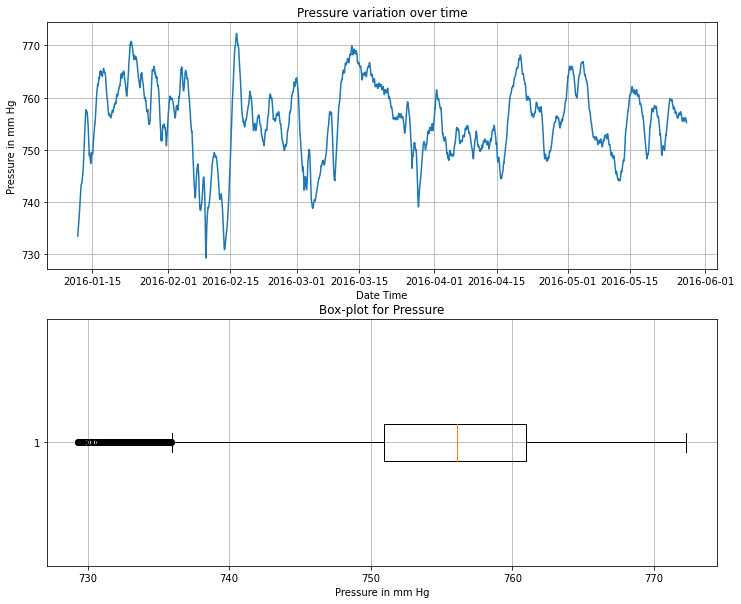

In [16]:
# Plots for Pressure

fig, ax = plt.subplots(2,1, figsize = (12,10))
ax[0].plot(df['date'], df['Press_mm_hg'])
ax[0].grid()
ax[0].set_ylabel('Pressure in mm Hg')
ax[0].set_xlabel('Date Time')
ax[0].set_title('Pressure variation over time')

ax[1].boxplot(df['Press_mm_hg'], vert=False)
ax[1].grid()
ax[1].set_xlabel('Pressure in mm Hg')
ax[1].set_title('Box-plot for Pressure')

Text(0.5, 1.0, 'Box-plot for Wind Speed')

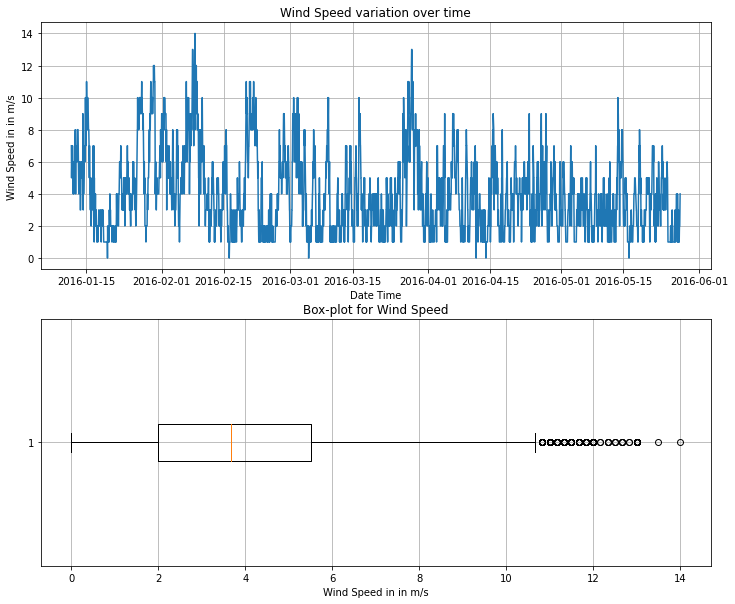

In [17]:
# Plots for Wind Speed

fig, ax = plt.subplots(2,1, figsize = (12,10))
ax[0].plot(df['date'], df['Windspeed'])
ax[0].grid()
ax[0].set_ylabel('Wind Speed in in m/s')
ax[0].set_xlabel('Date Time')
ax[0].set_title('Wind Speed variation over time')

ax[1].boxplot(df['Windspeed'], vert=False)
ax[1].grid()
ax[1].set_xlabel('Wind Speed in in m/s')
ax[1].set_title('Box-plot for Wind Speed')


Text(0.5, 1.0, 'Box-plot for Visibility')

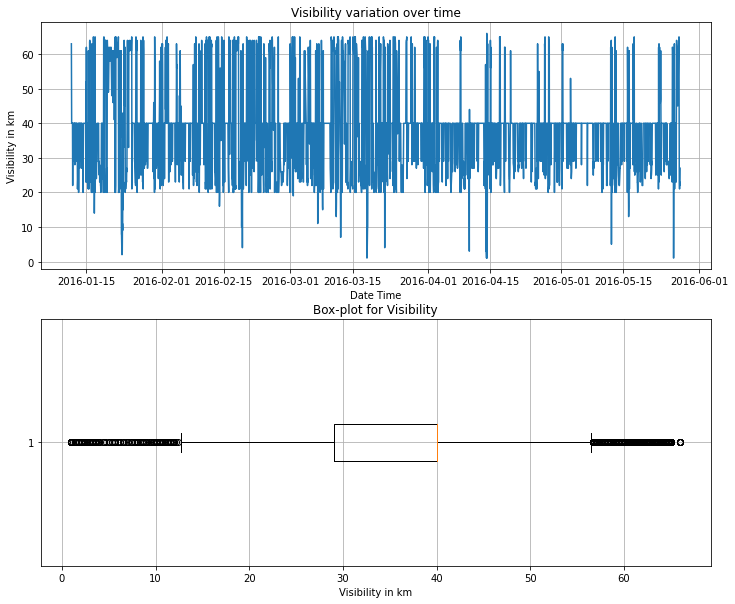

In [18]:
# Plots for Visibility

fig, ax = plt.subplots(2,1, figsize = (12,10))
ax[0].plot(df['date'], df['Visibility'])
ax[0].grid()
ax[0].set_ylabel('Visibility in km')
ax[0].set_xlabel('Date Time')
ax[0].set_title('Visibility variation over time')

ax[1].boxplot(df['Visibility'], vert=False)
ax[1].grid()
ax[1].set_xlabel('Visibility in km')
ax[1].set_title('Box-plot for Visibility')


Text(0.5, 1.0, 'Box-plot for Tdewpoint')

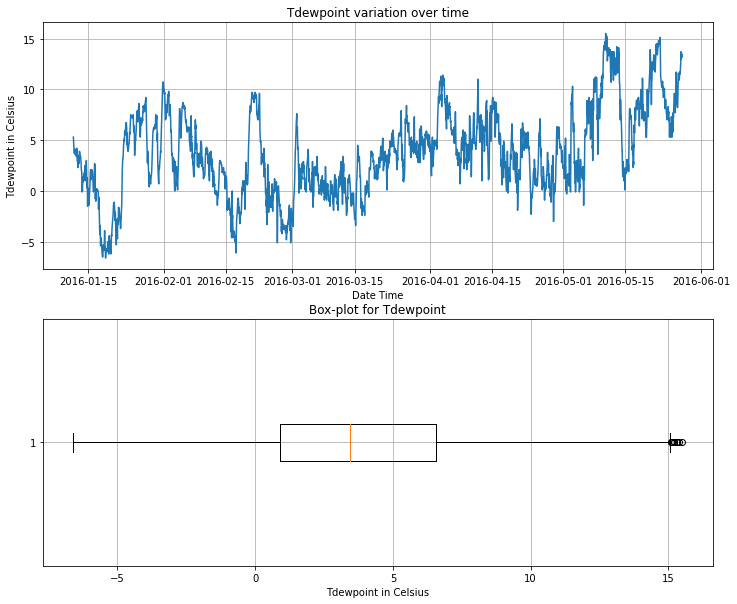

In [19]:
# Plots for Dew Point Temperature

fig, ax = plt.subplots(2,1, figsize = (12,10))
ax[0].plot(df['date'], df['Tdewpoint'])
ax[0].grid()
ax[0].set_ylabel('Tdewpoint in Celsius')
ax[0].set_xlabel('Date Time')
ax[0].set_title('Tdewpoint variation over time')

ax[1].boxplot(df['Tdewpoint'], vert=False)
ax[1].grid()
ax[1].set_xlabel('Tdewpoint in Celsius')
ax[1].set_title('Box-plot for Tdewpoint')


Weather Features above (Pressure, WindSpeed, Visibility and Tdewpoint) can be used as features.
These features can be used after normalization to bring them into similar scale

## Correlation Analysis

Perform correlation analysis between the numerical variables to:
1. Identify if any independent variable is highly correlated with energy use
2. If any independent variables that are highly correlated can be combined to reduce the number of features

In [20]:
# Overall correlation between all numeric features

corr = df.iloc[:,1:].corr()
round(corr,2)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
Appliances,1.00,0.20,0.06,0.09,0.12,-0.06,0.09,0.04,0.04,0.02,...,0.04,-0.09,0.01,-0.05,0.10,-0.03,-0.15,0.09,0.00,0.02
lights,0.20,1.00,-0.02,0.11,-0.01,0.05,-0.10,0.13,-0.01,0.11,...,-0.07,0.01,-0.16,-0.01,-0.07,-0.01,0.07,0.06,0.02,-0.04
T1,0.06,-0.02,1.00,0.16,0.84,-0.00,0.89,-0.03,0.88,0.10,...,0.83,-0.01,0.84,0.07,0.68,-0.15,-0.35,-0.09,-0.08,0.57
RH_1,0.09,0.11,0.16,1.00,0.27,0.80,0.25,0.84,0.11,0.88,...,-0.03,0.74,0.12,0.76,0.34,-0.29,0.27,0.20,-0.02,0.64
T2,0.12,-0.01,0.84,0.27,1.00,-0.17,0.74,0.12,0.76,0.23,...,0.58,0.07,0.68,0.16,0.79,-0.13,-0.51,0.05,-0.07,0.58
RH_2,-0.06,0.05,-0.00,0.80,-0.17,1.00,0.14,0.68,-0.05,0.72,...,-0.04,0.68,0.05,0.68,0.03,-0.26,0.58,0.07,-0.01,0.50
T3,0.09,-0.10,0.89,0.25,0.74,0.14,1.00,-0.01,0.85,0.12,...,0.80,0.04,0.90,0.13,0.70,-0.19,-0.28,-0.10,-0.10,0.65
RH_3,0.04,0.13,-0.03,0.84,0.12,0.68,-0.01,1.00,-0.14,0.90,...,-0.28,0.83,-0.20,0.83,0.12,-0.23,0.36,0.26,0.02,0.41
T4,0.04,-0.01,0.88,0.11,0.76,-0.05,0.85,-0.14,1.00,-0.05,...,0.80,-0.10,0.89,-0.03,0.66,-0.08,-0.39,-0.19,-0.10,0.52
RH_4,0.02,0.11,0.10,0.88,0.23,0.72,0.12,0.90,-0.05,1.00,...,-0.17,0.85,-0.04,0.86,0.29,-0.25,0.34,0.30,0.00,0.62


Text(0.5, 1.0, 'Correlation Matrix')

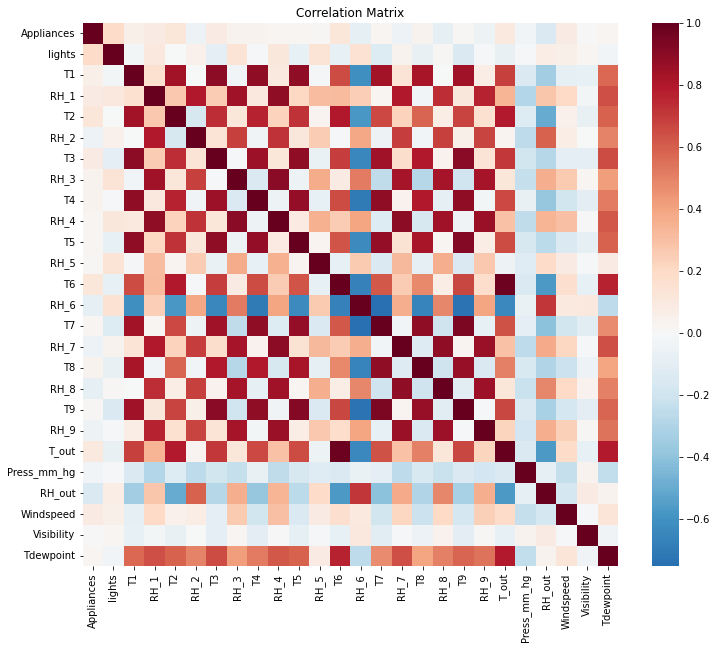

In [21]:
# Plotting the correlation matrix

fig, ax = plt.subplots(figsize = (12,10))
ax = sns.heatmap(ax=ax, data=corr, center=0, cmap='RdBu_r')
plt.title('Correlation Matrix', size=12)

### Observations
1. Temperature sensor readings are highly correlated with each other
2. Humidity sensor readings are highly correlated with each other
3. Appliance energy use does not have high correlation with any variable
4. Energy use by appliances and lights have correlation close to zero with temperature and humidity

In [22]:
# Correlation between all temperature readings

corr_temp = df[Temp].corr()
round(corr_temp,2)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T_out
T1,1.00,0.84,0.89,0.88,0.89,0.65,0.84,0.83,0.84,0.68
T2,0.84,1.00,0.74,0.76,0.72,0.80,0.66,0.58,0.68,0.79
T3,0.89,0.74,1.00,0.85,0.89,0.69,0.85,0.80,0.90,0.70
T4,0.88,0.76,0.85,1.00,0.87,0.65,0.88,0.80,0.89,0.66
T5,0.89,0.72,0.89,0.87,1.00,0.63,0.87,0.82,0.91,0.65
T6,0.65,0.80,0.69,0.65,0.63,1.00,0.62,0.48,0.67,0.97
T7,0.84,0.66,0.85,0.88,0.87,0.62,1.00,0.88,0.94,0.63
T8,0.83,0.58,0.80,0.80,0.82,0.48,0.88,1.00,0.87,0.50
T9,0.84,0.68,0.90,0.89,0.91,0.67,0.94,0.87,1.00,0.67
T_out,0.68,0.79,0.70,0.66,0.65,0.97,0.63,0.50,0.67,1.00


Text(0.5, 1.0, 'Correlation Matrix for Temperature')

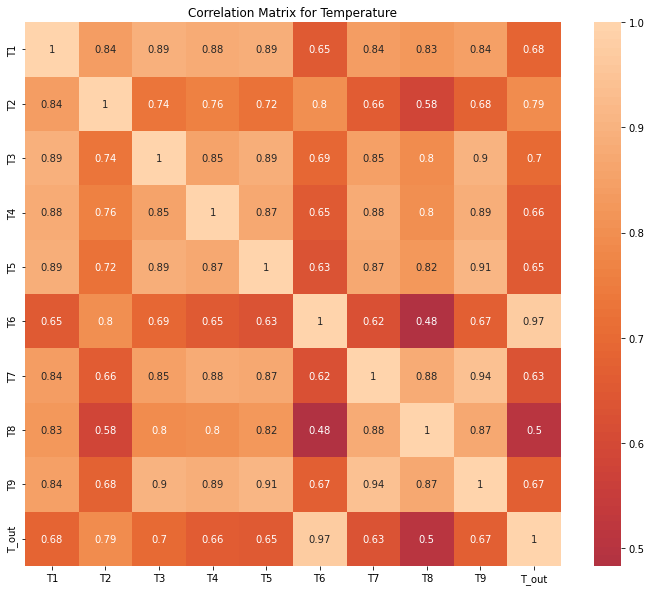

In [23]:
# Plotting the correlation matrix for temperature readings

fig, ax = plt.subplots(figsize = (12,10))
ax = sns.heatmap(ax=ax, data=corr_temp, annot=True, center=0)
plt.title('Correlation Matrix for Temperature', size=12)

### Observations
1. Temperatures measured inside the house have high correlation with each other except T2, T6 and T_out.
2. These temperatures can be combined by taking average temperature
3. T6 (Building outside), T_out (weather station) have high correlation as both of them are outside temperatures and validates the readings
4. T2 (Living Room) is correlated with T6, T_out and T1 (Kitchen)

In [24]:
# Correlation between all humidity readings

corr_hum = df[Hum].corr()
round(corr_hum,2)

,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,RH_out
RH_1,1.00,0.80,0.84,0.88,0.30,0.25,0.80,0.74,0.76,0.27
RH_2,0.80,1.00,0.68,0.72,0.25,0.39,0.69,0.68,0.68,0.58
RH_3,0.84,0.68,1.00,0.90,0.38,0.51,0.83,0.83,0.83,0.36
RH_4,0.88,0.72,0.90,1.00,0.35,0.39,0.89,0.85,0.86,0.34
RH_5,0.30,0.25,0.38,0.35,1.00,0.26,0.33,0.36,0.27,0.19
RH_6,0.25,0.39,0.51,0.39,0.26,1.00,0.36,0.49,0.39,0.72
RH_7,0.80,0.69,0.83,0.89,0.33,0.36,1.00,0.88,0.86,0.38
RH_8,0.74,0.68,0.83,0.85,0.36,0.49,0.88,1.00,0.86,0.49
RH_9,0.76,0.68,0.83,0.86,0.27,0.39,0.86,0.86,1.00,0.36
RH_out,0.27,0.58,0.36,0.34,0.19,0.72,0.38,0.49,0.36,1.00


Text(0.5, 1.0, 'Correlation Matrix for Humidity')

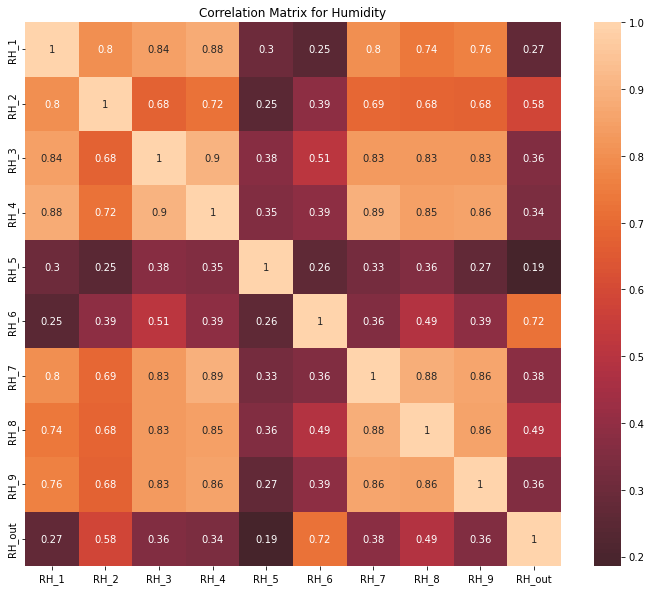

In [25]:
# Plotting the correlation matrix for humidity readings

fig, ax = plt.subplots(figsize = (12,10))
ax = sns.heatmap(ax=ax, data=corr_hum, annot=True, center=0)
plt.title('Correlation Matrix for Humidity', size=12)

### Observations
1. In general, the correlation between humidity sensors are lower compared to temperature sensors
2. Humidity measured inside the house have high correlation with each other except RH_2, RH_5, RH_6 and RH_out.
3. These humidity readings can be combined by taking average humidity
4. RH_6 (Building outside), RH_out (weather station) have relatively high correlation as both of them are outside humidity and validates the readings
5. RH_2 (Living Room) has high correlation with RH_2 (Kitchen), suggesting they share common space
6. RH_5 (Bathroom) does not have any correlation with other humidity sensors and has high humidity in general

<AxesSubplot:xlabel='date'>

<Figure size 432x288 with 0 Axes>

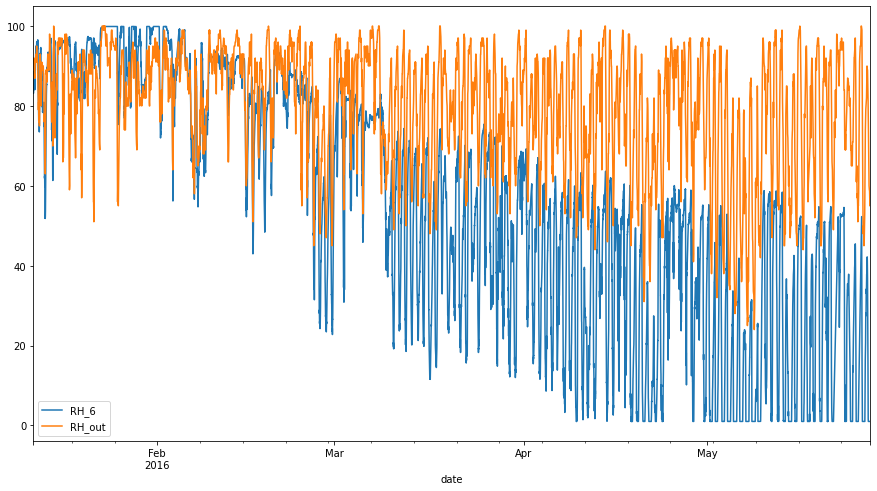

In [26]:
# Investigation of difference between RH_6 (Building Outside) and RH_out (weather station)

fig = plt.figure()
df.plot(x = 'date', y = ['RH_6', 'RH_out'], figsize = (15,8))

Looks like sensor measuring humidity outside the building had a malfunction in mid-february and the readings have been drifting down. This makes the data from RH_6 unusable and will be removed from the analysis.

<AxesSubplot:xlabel='date'>

<Figure size 432x288 with 0 Axes>

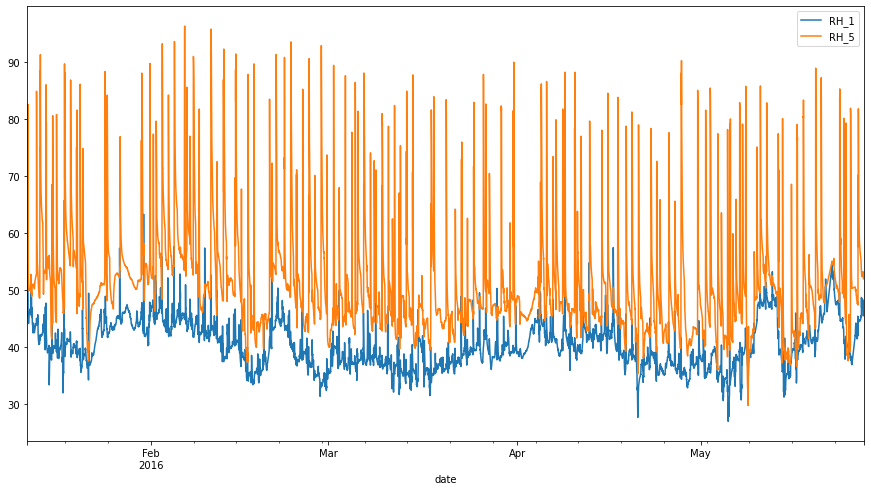

In [27]:
# Investigation of humidity reading of RH_5 (Bathroom) against RH_1 (Kitchen)

fig = plt.figure()
df.plot(x = 'date', y = ['RH_1','RH_5'], figsize = (15,8))

As expected, humidity in the bathroom (RH_5) is generally high and has high spikes (possibly during showers).